In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#data preparation
df=pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [4]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data=df.values
x=data[:,1:]
y=data[:,0]
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [11]:
split=int(0.8*x.shape[0])
x_train=x[:split,:]
y_train=y[:split]

x_test=x[split:,:]
y_test=y[split:]
print(x_train.shape)
print(x_test.shape)

(33600, 784)
(8400, 784)


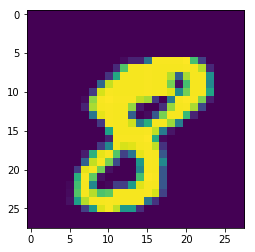

8


In [14]:
#visualizing some images

def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

drawImg(x_train[10])
print(y_train[10])

In [27]:
def dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def knn(x,y,queryPoint,k=5):
    vals=[]
    for i in range(x.shape[0]):
        d=dist(x[i],queryPoint)
        vals.append((d,y[i]))
    
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    predict=new_vals[0][index]
    return predict


In [31]:
pred=knn(x_train,y_train,x_test[5])
print(pred)

6.0


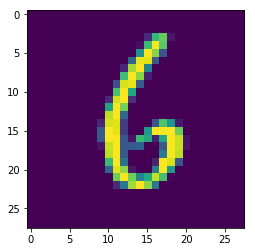

6


In [30]:
drawImg(x_test[5])
print(y_test[5])